<a href="https://colab.research.google.com/github/Ryukito0116/-/blob/master/%E7%8A%AC%E3%81%AB%E3%82%83%E3%82%93%E3%81%93%E5%88%A4%E5%88%A5%E6%A9%9F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [ ]:
#　画像収集ライブラリをいんすとーる
!pip install icrawler

In [ ]:
# catフォルダ作成後、猫の画像を100枚取得する
# ただし79枚しか取得できてない、、
from icrawler.builtin import BingImageCrawler
crawler = BingImageCrawler(storage={"root_dir": "cat"})
crawler.crawl(keyword="猫", max_num=100)

2021-01-20 16:05:06,336 - INFO - icrawler.crawler - start crawling...
2021-01-20 16:05:06,337 - INFO - icrawler.crawler - starting 1 feeder threads...
2021-01-20 16:05:06,342 - INFO - feeder - thread feeder-001 exit
2021-01-20 16:05:06,342 - INFO - icrawler.crawler - starting 1 parser threads...
2021-01-20 16:05:06,346 - INFO - icrawler.crawler - starting 1 downloader threads...
2021-01-20 16:05:06,686 - INFO - parser - parsing result page https://www.bing.com/images/async?q=猫&first=0
2021-01-20 16:05:06,710 - INFO - downloader - skip downloading file 000001.jpg
2021-01-20 16:05:06,712 - INFO - downloader - skip downloading file 000002.jpg
2021-01-20 16:05:06,713 - INFO - downloader - skip downloading file 000003.jpg
2021-01-20 16:05:06,715 - INFO - downloader - skip downloading file 000004.jpg
2021-01-20 16:05:06,717 - INFO - downloader - skip downloading file 000005.jpg
2021-01-20 16:05:06,718 - INFO - downloader - skip downloading file 000006.jpg
2021-01-20 16:05:06,720 - INFO - dow

In [ ]:
# どgフォルダ作成後、犬の画像を100枚取得する
# ただし80枚しか取得できてない、、
from icrawler.builtin import BingImageCrawler
crawler = BingImageCrawler(storage={"root_dir": "dog"})
crawler.crawl(keyword="犬", max_num=100)

2021-01-20 16:06:16,434 - INFO - icrawler.crawler - start crawling...
2021-01-20 16:06:16,436 - INFO - icrawler.crawler - starting 1 feeder threads...
2021-01-20 16:06:16,439 - INFO - feeder - thread feeder-001 exit
2021-01-20 16:06:16,440 - INFO - icrawler.crawler - starting 1 parser threads...
2021-01-20 16:06:16,443 - INFO - icrawler.crawler - starting 1 downloader threads...
2021-01-20 16:06:16,722 - INFO - parser - parsing result page https://www.bing.com/images/async?q=犬&first=0
2021-01-20 16:06:16,759 - INFO - downloader - skip downloading file 000001.jpg
2021-01-20 16:06:16,760 - INFO - downloader - skip downloading file 000002.jpg
2021-01-20 16:06:16,763 - INFO - downloader - skip downloading file 000003.jpg
2021-01-20 16:06:16,765 - INFO - downloader - skip downloading file 000004.jpg
2021-01-20 16:06:16,767 - INFO - downloader - skip downloading file 000005.jpg
2021-01-20 16:06:16,769 - INFO - downloader - skip downloading file 000006.jpg
2021-01-20 16:06:16,770 - INFO - dow

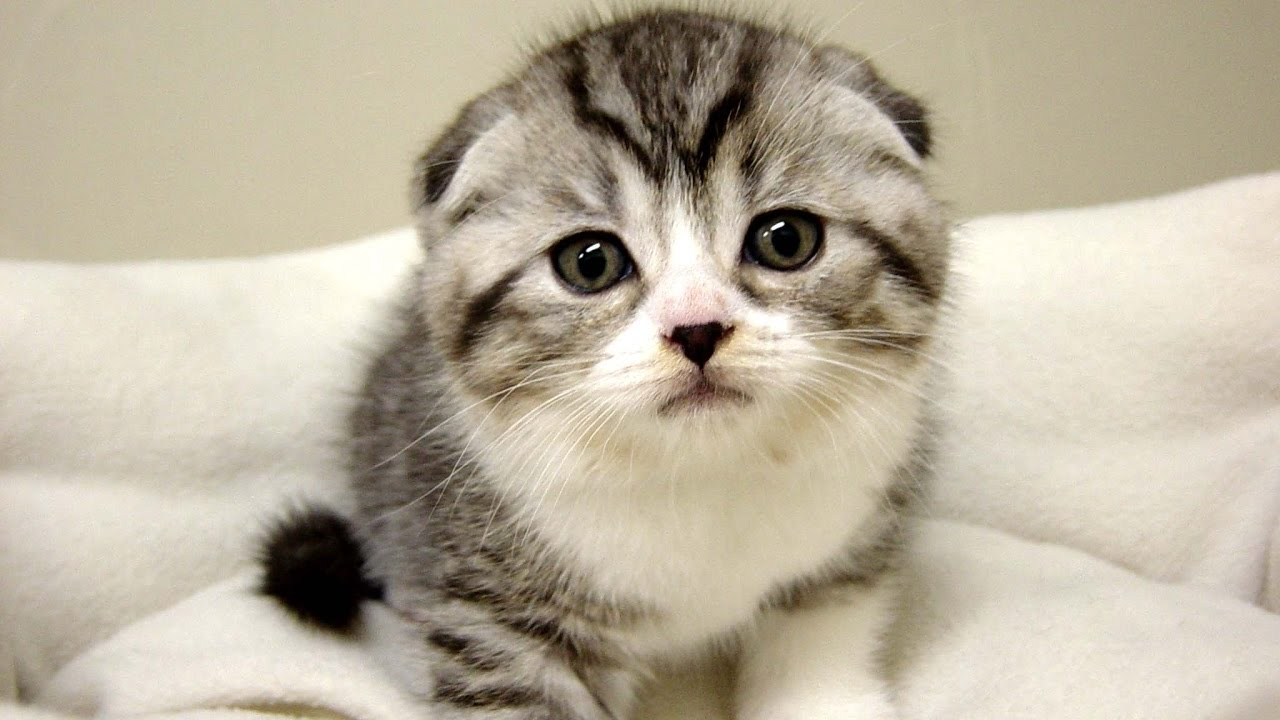

In [ ]:
# catフォルダから猫の画像を表示する。かわいい！
from IPython.display import Image,display_jpeg
display_jpeg(Image("./cat/000001.jpg"))

In [ ]:
# データの前処理と分割
from PIL import Image
import PIL.Image
import os, glob
import numpy as np
from PIL import ImageFile
# IOError: image file is truncated (0 bytes not processed)回避のため
ImageFile.LOAD_TRUNCATED_IMAGES = True

classes = ["dog", "cat"]
num_classes = len(classes)
image_size = 64
num_testdata = 25

X_train = []
X_test  = []
y_train = []
y_test  = []

for index, classlabel in enumerate(classes):
    photos_dir = "./" + classlabel
    files = glob.glob(photos_dir + "/*.jpg")
    for i, file in enumerate(files):
        image = Image.open(file)
        image = image.convert("RGB")
        image = image.resize((image_size, image_size))
        data = np.asarray(image)
        if i < num_testdata:
            X_test.append(data)
            y_test.append(index)
        else:

            # angleに代入される値
            # -20
            # -15
            # -10
            #  -5
            # 0
            # 5
            # 10
            # 15
            # 画像を5度ずつ回転
            for angle in range(-20, 20, 5):

                img_r = image.rotate(angle)
                data = np.asarray(img_r)
                X_train.append(data)
                y_train.append(index)
                # FLIP_LEFT_RIGHT　は 左右反転
                img_trains = img_r.transpose(Image.FLIP_LEFT_RIGHT)
                data = np.asarray(img_trains)
                X_train.append(data)
                y_train.append(index)

X_train = np.array(X_train)
X_test  = np.array(X_test)
y_train = np.array(y_train)
y_test  = np.array(y_test)

xy = (X_train, X_test, y_train, y_test)
np.save("./dog_cat.npy", xy)

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


In [ ]:
# 学習フェーズ
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.optimizers import RMSprop
from keras.utils import np_utils
import keras
import numpy as np

classes = ["dog", "cat"]
num_classes = len(classes)
image_size = 64

"""
データを読み込む関数
"""
def load_data():
    X_train, X_test, y_train, y_test = np.load("./dog_cat.npy", allow_pickle=True)
    # 入力データの各画素値を0-1の範囲で正規化(学習コストを下げるため)
    X_train = X_train.astype("float") / 255
    X_test  = X_test.astype("float") / 255
    # to_categorical()にてラベルをone hot vector化
    y_train = np_utils.to_categorical(y_train, num_classes)
    y_test  = np_utils.to_categorical(y_test, num_classes)

    return X_train, y_train, X_test, y_test

"""
モデルを学習する関数
"""
def train(X, y, X_test, y_test):
    model = Sequential()

    # Xは(1200, 64, 64, 3)
    # X.shape[1:]とすることで、(64, 64, 3)となり、入力にすることが可能です。
    model.add(Conv2D(32,(3,3), padding='same',input_shape=X.shape[1:]))
    model.add(Activation('relu'))
    model.add(Conv2D(32,(3,3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.1))

    model.add(Conv2D(64,(3,3), padding='same'))
    model.add(Activation('relu'))
    model.add(Conv2D(64,(3,3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(512))
    model.add(Activation('relu'))
    model.add(Dropout(0.45))
    model.add(Dense(2))
    model.add(Activation('softmax'))

    # https://keras.io/ja/optimizers/
    # 今回は、最適化アルゴリズムにRMSpropを利用
    opt = RMSprop(lr=0.00005, decay=1e-6)
    # https://keras.io/ja/models/sequential/
    model.compile(loss='categorical_crossentropy',optimizer=opt,metrics=['accuracy'])
    model.fit(X, y, batch_size=28, epochs=40)
    # HDF5ファイルにKerasのモデルを保存
    model.save('./cnn.h5')

    return model

"""
メイン関数
データの読み込みとモデルの学習を行います。
"""
def main():
    # データの読み込み
    X_train, y_train, X_test, y_test = load_data()

    # モデルの学習
    model = train(X_train, y_train, X_test, y_test)

main()

Epoch 1/40
63/63 [==============================] - 3s 29ms/step - loss: 0.6940 - accuracy: 0.5236
Epoch 2/40
63/63 [==============================] - 2s 25ms/step - loss: 0.6452 - accuracy: 0.6502
Epoch 3/40
63/63 [==============================] - 2s 25ms/step - loss: 0.5883 - accuracy: 0.6983
Epoch 4/40
63/63 [==============================] - 2s 25ms/step - loss: 0.5280 - accuracy: 0.7408
Epoch 5/40
63/63 [==============================] - 2s 25ms/step - loss: 0.4989 - accuracy: 0.7730
Epoch 6/40
63/63 [==============================] - 2s 26ms/step - loss: 0.4687 - accuracy: 0.7965
Epoch 7/40
63/63 [==============================] - 2s 25ms/step - loss: 0.4280 - accuracy: 0.7971
Epoch 8/40
63/63 [==============================] - 2s 25ms/step - loss: 0.4028 - accuracy: 0.8244
Epoch 9/40
63/63 [==============================] - 2s 25ms/step - loss: 0.3838 - accuracy: 0.8423
Epoch 10/40
63/63 [==============================] - 2s 25ms/step - loss: 0.3695 - accuracy: 0.8409
Epoch 11/

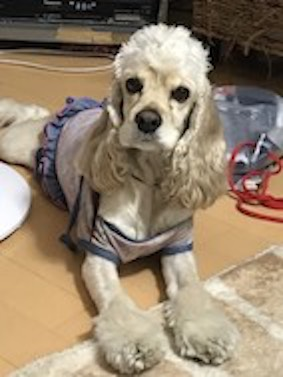

In [ ]:
# 以下の画像を検証するよ
from IPython.display import Image,display_jpeg
display_jpeg(Image("./dog1.jpg"))

In [ ]:
# 上の画像はなんだろ？ここで検証して結果を出力
import keras
import sys, os
import numpy as np
from keras.models import load_model

imsize = (64, 64)


testpic     = "./dog1.jpg" ###ここに画像をセット！
keras_param = "./cnn.h5"

def load_image(path):
    img = Image.open(path)
    img = img.convert('RGB')
    # 学習時に、(64, 64, 3)で学習したので、画像の縦・横は今回 変数imsizeの(64, 64)にリサイズします。
    img = img.resize(imsize)
    # 画像データをnumpy配列の形式に変更
    img = np.asarray(img)
    img = img / 255.0
    return img

model = load_model(keras_param)
img = load_image(testpic)
prd = model.predict(np.array([img]))
print(prd) # 精度の表示
prelabel = np.argmax(prd, axis=1)
if prelabel == 0:
    print(">>> 上の画像は犬だよ！！")
elif prelabel == 1:
    print(">>> 上の画像はかわいいにゃんこ！")

2021-01-20 16:17:33,273 - WARNING - tensorflow - 7 out of the last 7 calls to <function Model.make_predict_function.<locals>.predict_function at 0x7f72f5193510> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.


[[1.0000000e+00 1.6121041e-09]]
>>> 上の画像は犬だよ！！


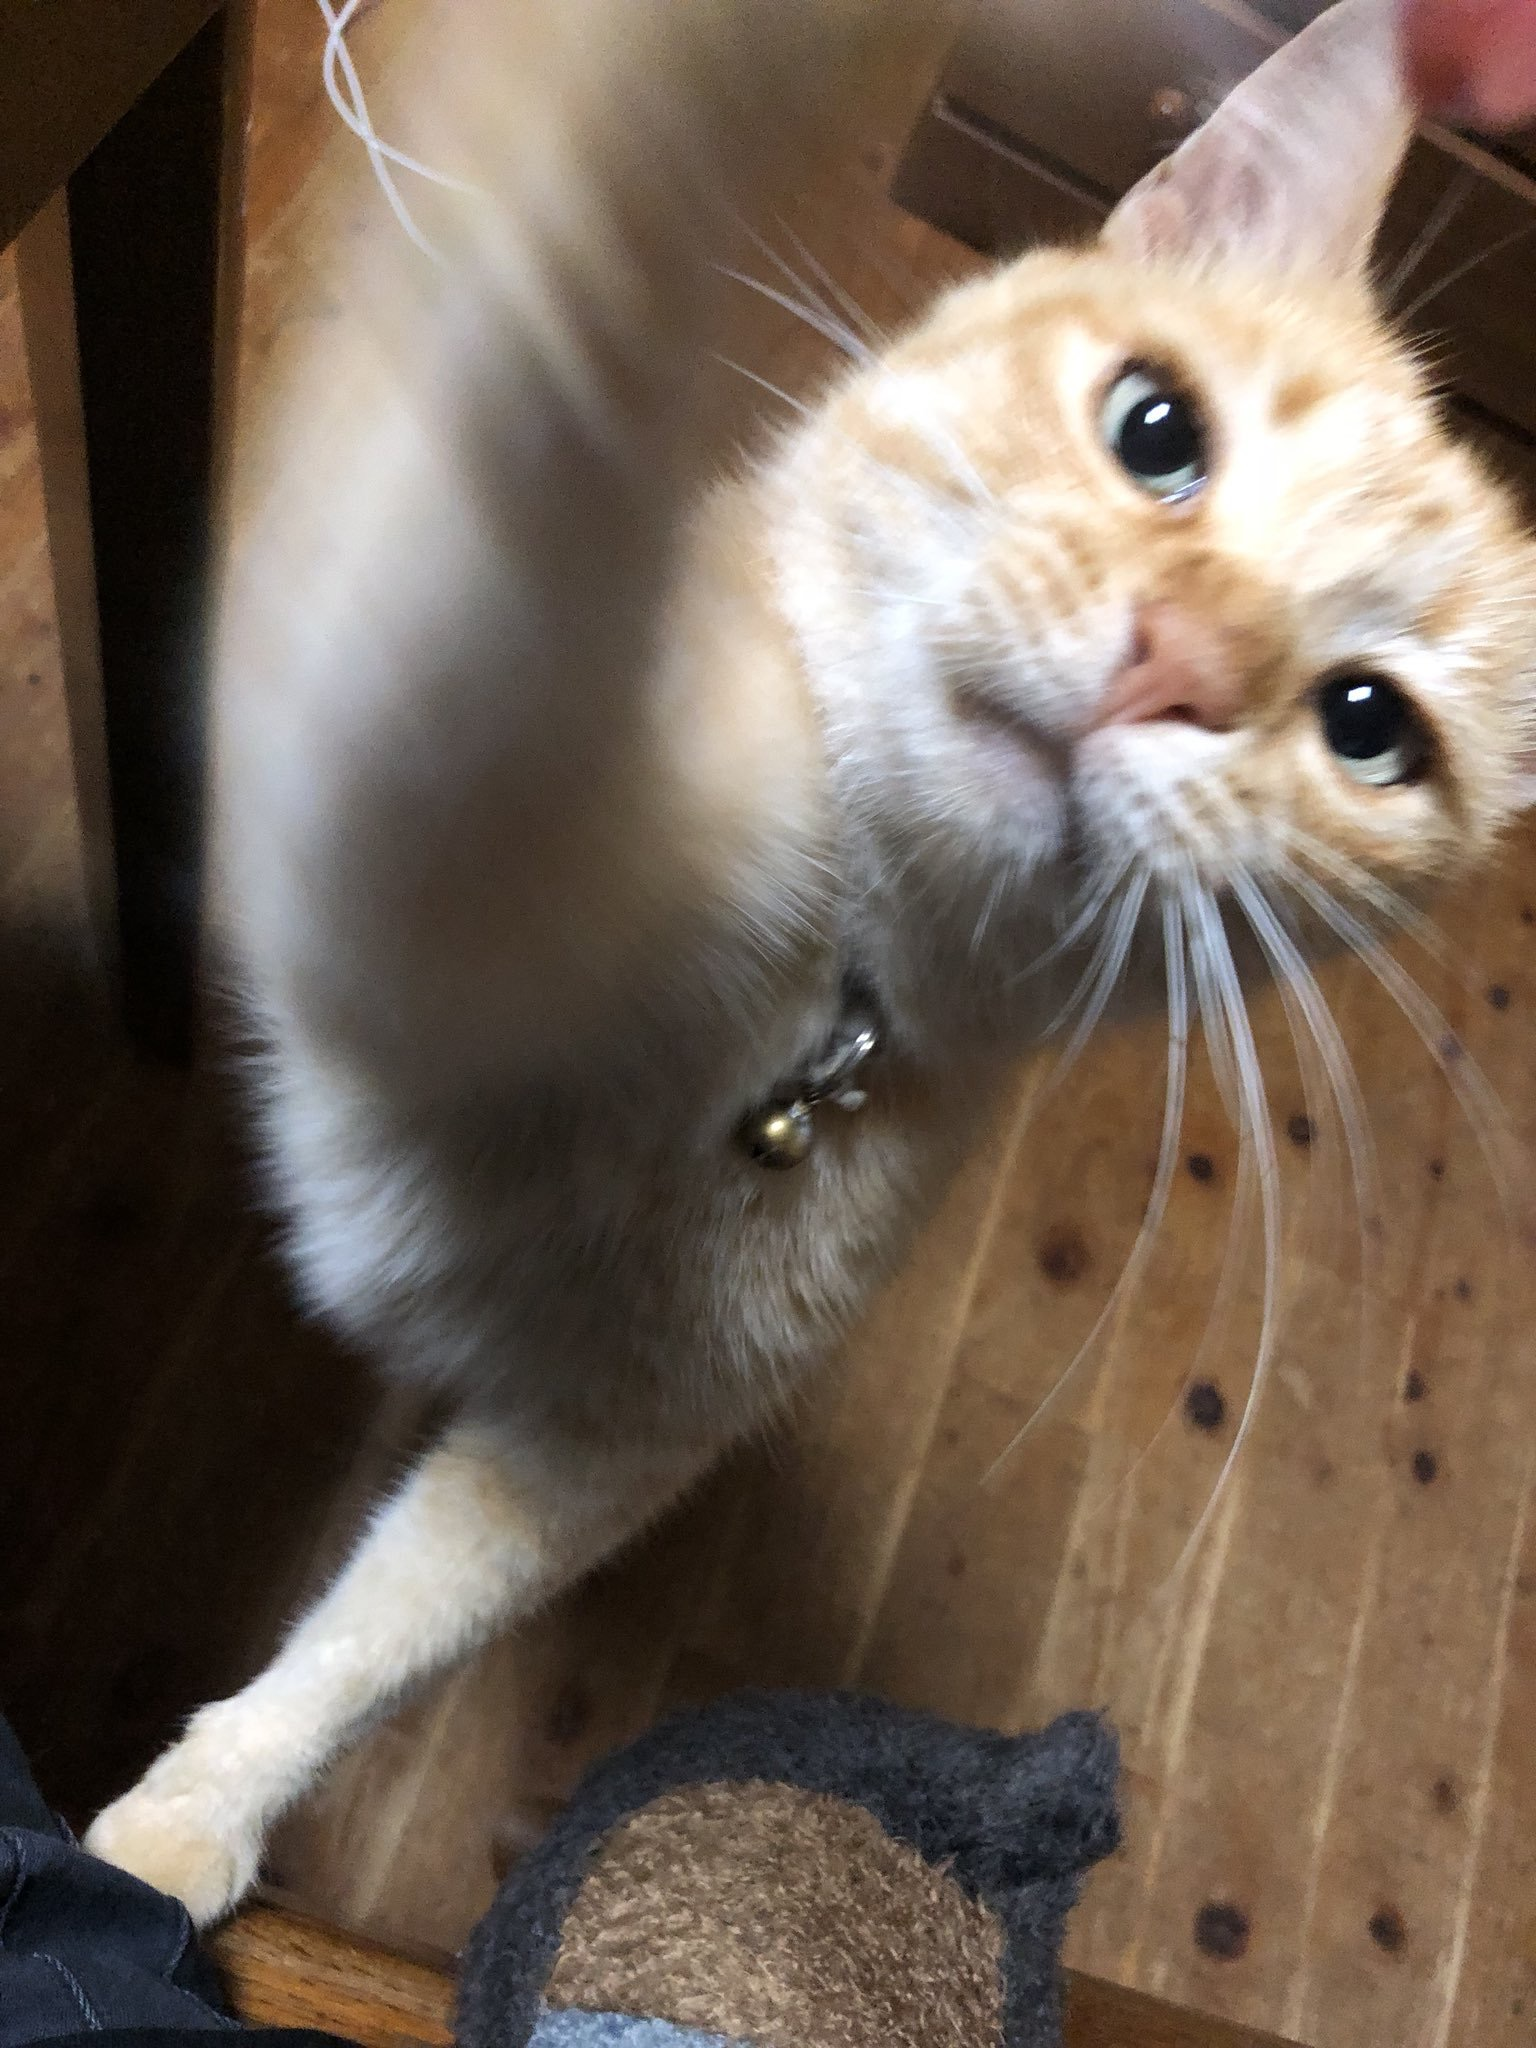

In [ ]:
# 以下の画像を検証するよ
from IPython.display import Image,display_jpeg
display_jpeg(Image("./cat.jpg"))

In [ ]:
# 上の画像はなんだろ？ここで検証して結果を出力
import keras
import sys, os
import numpy as np
from keras.models import load_model

imsize = (64, 64)


testpic     = "./cat.jpg" ###ここに画像をセット！
keras_param = "./cnn.h5"

def load_image(path):
    img = Image.open(path)
    img = img.convert('RGB')
    # 学習時に、(64, 64, 3)で学習したので、画像の縦・横は今回 変数imsizeの(64, 64)にリサイズします。
    img = img.resize(imsize)
    # 画像データをnumpy配列の形式に変更
    img = np.asarray(img)
    img = img / 255.0
    return img

model = load_model(keras_param)
img = load_image(testpic)
prd = model.predict(np.array([img]))
print(prd) # 精度の表示
prelabel = np.argmax(prd, axis=1)
if prelabel == 0:
    print(">>> 上の画像は犬だよ！！")
elif prelabel == 1:
    print(">>> 上の画像はかわいいにゃんこ！")

2021-01-20 16:17:40,597 - WARNING - tensorflow - 8 out of the last 8 calls to <function Model.make_predict_function.<locals>.predict_function at 0x7f72f8c6ee18> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.


[[0.22591956 0.77408046]]
>>> 上の画像はかわいいにゃんこ！
